In [114]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")

In [248]:
i410_path = "/Users/sean/Desktop/Analyses for Jodie's new Data/2018_10_03_HD233_SAY47/i410.csv"
i470_path = "/Users/sean/Desktop/Analyses for Jodie's new Data/2018_10_03_HD233_SAY47/i470.csv"
strains_path = "/Users/sean/Desktop/Analyses for Jodie's new Data/2018_10_03_HD233_SAY47/strains.csv"
movement_path = "/Users/sean/Desktop/Analyses for Jodie's new Data/2018_10_03_HD233_SAY47/movement.csv"

i410 = np.genfromtxt(i410_path, delimiter=',') # [animal x position] (row x col)
i470 = np.genfromtxt(i470_path, delimiter=',')
strains = pd.read_csv(strains_path)
movement = pd.read_csv(movement_path, header=None)
movement.columns =  ['movement']

In [249]:
def gen_strain_idx_df(strain_df):
    
    n_animals = strain_df["End"].max()
    unique_strains = strain_df["Strain"].unique()
    
    zeros = np.zeros((n_animals, 1))
    
    strain_idx = pd.DataFrame(data=zeros, columns=['strain'])
    for idx,row in strain_df.iterrows():
        strain_idx['strain'][row['Start']-1:row['End']] = row['Strain']
    return strain_idx

In [253]:
cols_i410 = list(map(lambda x: 'i410_%d' % x, range(np.size(i410, 1))))
cols_i470 = list(map(lambda x: 'i470_%d' % x, range(np.size(i470, 1))))
i410_df = pd.DataFrame(data=i410, columns=cols_i410)
i470_df = pd.DataFrame(data=i470, columns=cols_i470)

In [254]:
df = pandas.concat([gen_strain_idx_df(strains), movement, i410_df, i470_df], axis=1)

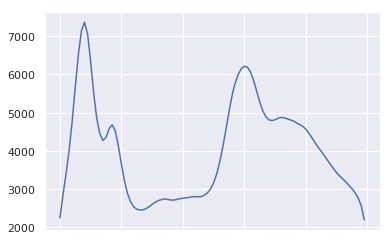

In [262]:
df[df['strain'] == 'HD233'].loc[:,cols_i410[0]:cols_i410[-1]].mean().plot()

In [265]:
df.groupby('strain')

In [269]:
np.savetxt(X=np.zeros((121,1)), fname='/Users/sean/Desktop/vab1_2do_05_25_mvmt_new/movement.csv')